# Context

The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. 

It includes abundance data on the larvae of over 250 species of fish larval length frequency data and egg abundance data on key commercial species and oceanographic and plankton data. 

The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them. 

(https://www.kaggle.com/datasets/sohier/calcofi)

## Analysis Question

Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity?

**The used Libraries !**

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns # visualization library
import warnings


**Reading the data**

In [2]:
data_bottle = pd.read_csv(r'C:\Users\hp\Desktop\last ones\Projects for Resume\CalCOFI\bottle.csv')
data_cast = pd.read_csv(r'C:\Users\hp\Desktop\last ones\Projects for Resume\CalCOFI\cast.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_4528\1519424548.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data_bottle = pd.read_csv(r'C:\Users\hp\Desktop\last ones\Projects for Resume\CalCOFI\bottle.csv')
C:\Users\hp\AppData\Local\Temp\ipykernel_4528\1519424548.py:2: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data_cast = pd.read_csv(r'C:\Users\hp\Desktop\last ones\Projects for Resume\CalCOFI\cast.csv')


In [3]:
# data_bottle.head(6)

In [4]:
data_cast.head(6)

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN
5,6,1949-03-01-C-31CR,194903,19490304901140,4901140,19-4903CR-HY-062-0036-04901140,049.0 114.0,1,NST,NaN,...,NaN,25.0,13.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


## let's explore the data columns !!

In [5]:
print(data_bottle.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

## Dataset Overview

This dataset contains **864,863** entries and **74** columns, providing various environmental or oceanographic measurements. Below is a detailed breakdown of the dataset:

### Data Summary

- **Total Rows:** 864,863
- **Total Columns:** 74
- **Data Types:**
  - `int64`: 5 columns
  - `float64`: 65 columns
  - `object`: 4 columns


let's obtain a basic description of the data. This will provide us with a simple and straightforward way to gain initial insights into the data, as well as a basic understanding of its characteristics.

In [6]:
data_bottle.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


### Key Insights:
- **Temperature (`T_degC`)**: The average temperature is 10.8°C, with a minimum of 1.44°C and a maximum of 31.14°C.
- **Salinity (`Salnty`)**: Mean salinity is around 33.84 PSU with a small standard deviation of 0.46.
- **Oxygen Concentration (`O2ml_L`)**: The mean is 3.39 ml/L, but some negative values (e.g., -0.01) might indicate data errors or specific conditions.
- **Depth (`Depthm`)**: Ranges from 0 to 5,351 meters, with an average depth of 226.83 meters.

### Checking & Cleaning dataframe for NA-values

<div style="color:white;display:fill;border-radius:8px;font-size:120%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#F1A424;text-align:center'>Nan Values Visualization </span></b></p></div> 

In [7]:
plt.rcParams["figure.figsize"] = (8,5)
sns.heatmap(data_bottle.isna(),cbar=False,cmap='viridis')

<Axes: >

Error in callback <function _draw_all_if_interactive at 0x00000228DCD0CEE0> (for post_execute):


MemoryError: Unable to allocate 1.91 GiB for an array with shape (63999862, 4) and data type float64

MemoryError: Unable to allocate 1.91 GiB for an array with shape (63999862, 4) and data type float64

<Figure size 800x500 with 1 Axes>


### Key Observations:
- **Columns with significant missing data**: Certain columns such as `DIC1`, `DIC2`, `TA1`, `TA2`, `pH2`, and `pH1` exhibit a large number of missing values (yellow bars).
- **Columns with minimal missing data**: Columns like `Cst_Cnt`, `Btl_Cnt`, `Depthm`, and `Salnty` have relatively fewer missing values.
- **Data sparsity**: Some sections of the dataset (rows) show a dense concentration of missing data, particularly in specific columns, making it essential to handle this missing data before proceeding with any further analysis.


### Missing Values in `data_bottle` Dataset

The command `data_bottle.isnull().sum()` outputs the total number of missing values for each column in the dataset. Below is a sample of the results:


In [8]:
data_bottle.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64


### Interpretation

- **Columns without missing data**: Columns such as `Cst_Cnt`, `Btl_Cnt`, `Sta_ID`, `Depth_ID`, and `Depthm` have no missing values.
- **Columns with significant missing data**: Some columns like `TA1`, `TA2`, `pH2`, and `DIC Quality Comment` have a large number of missing values, with more than 99% of the data missing in these columns.
- **Impact on analysis**: Columns with a high proportion of missing data might need to be carefully handled, possibly through imputation, removal, or other methods, to avoid bias in any subsequent analysis or modeling.

This initial analysis highlights the areas where missing data might affect the overall dataset quality.

In [9]:
min_count =  int(data_bottle.shape[0]*0.7)

data_bottle.dropna(axis=1, thresh= min_count, inplace= True)
data_bottle.shape



(864863, 32)

 **We've started with  74 colums and we decided to take offany columns with more than 75 % of "Nan" values !\n    and ant the end we've got 32 colums that mean 42 colums are not any more used** 

In [10]:
data_bottle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cst_Cnt      864863 non-null  int64  
 1   Btl_Cnt      864863 non-null  int64  
 2   Sta_ID       864863 non-null  object 
 3   Depth_ID     864863 non-null  object 
 4   Depthm       864863 non-null  int64  
 5   T_degC       853900 non-null  float64
 6   Salnty       817509 non-null  float64
 7   O2ml_L       696201 non-null  float64
 8   STheta       812174 non-null  float64
 9   O2Sat        661274 non-null  float64
 10  Oxy_µmol/Kg  661268 non-null  float64
 11  RecInd       864863 non-null  int64  
 12  T_prec       853900 non-null  float64
 13  S_prec       817509 non-null  float64
 14  P_qual       673755 non-null  float64
 15  Chlqua       639166 non-null  float64
 16  Phaqua       639170 non-null  float64
 17  NH3q         808299 non-null  float64
 18  C14A1q       848605 non-

**After that evache variable with less that 25 unique value will be considerated as an categorical variable** 


''' this can be ignored in manny analysis but is just a preference here '''

In [11]:
obj_var = data_bottle.select_dtypes(include='object').columns
cat_var = []
for variable in data_bottle.columns:
    if data_bottle[variable].nunique() < 25:
        cat_var.append(variable)

cat_var.extend(obj_var)

In [12]:
data_bottle.drop(cat_var, axis= 1, inplace= True)
data_bottle.info() # no categorial variables found after the first condition

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cst_Cnt      864863 non-null  int64  
 1   Btl_Cnt      864863 non-null  int64  
 2   Depthm       864863 non-null  int64  
 3   T_degC       853900 non-null  float64
 4   Salnty       817509 non-null  float64
 5   O2ml_L       696201 non-null  float64
 6   STheta       812174 non-null  float64
 7   O2Sat        661274 non-null  float64
 8   Oxy_µmol/Kg  661268 non-null  float64
 9   R_Depth      864863 non-null  float64
 10  R_TEMP       853900 non-null  float64
 11  R_POTEMP     818816 non-null  float64
 12  R_SALINITY   817509 non-null  float64
 13  R_SIGMA      812007 non-null  float64
 14  R_SVA        812092 non-null  float64
 15  R_DYNHT      818206 non-null  float64
 16  R_O2         696201 non-null  float64
 17  R_O2Sat      666448 non-null  float64
 18  R_PRES       864863 non-

### Eliminating Irrelevant Columns

In addition to addressing missing values, it is also essential to eliminate columns that are not relevant to the analysis. Based on the field description of the **CalCOFI** dataset obtained from [CalCOFI bottle database](https://calcofi.org/data/oceanographic-data/bottle-database/), it has been determined that the columns **"Cst_Cnt"** and **"Btl_Cnt"** do not hold significant analytical value. As a result, these columns will be manually removed from the data to simplify the analysis.


In [13]:
data_bottle.drop(['Cst_Cnt', 'Btl_Cnt'], axis= 1, inplace= True) 

### Removing Duplicate Columns
In addition to removing non-relevant columns, it is also necessary to eliminate duplicates.
The CalCOFI dataset includes of the following columns: "R_TEMP", "R_POTEMP", "R_SALINITY", "R_O2", "R_DYNHT", "R_SIGMA", "R_SVA", and "R_Depth", all under the "Reported" category. These columns will be manually dropped to ensure the accuracy and integrity of the analysis.

In [14]:
data_bottle.drop(['R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_O2', 'R_DYNHT', 'R_SIGMA', 'R_SVA', 'R_Depth'],
                    axis= 1, inplace= True)

### Handling Missing Values
Due to the high number of available row-entries, all rows with missing interesting variables (T_degC, Salnty) will be dropped.

In [15]:
data_bottle.isnull().sum()

Depthm              0
T_degC          10963
Salnty          47354
O2ml_L         168662
STheta          52689
O2Sat          203589
Oxy_µmol/Kg    203595
R_O2Sat        198415
R_PRES              0
dtype: int64

**Interpretation:**

- Columns like T_degC and Salnty have some missing values, while columns related to oxygen measurements (O2ml_L, O2Sat, and Oxy_µmol/Kg) have significantly higher missing values, indicating data sparsity in these fields.
- Columns like Depthm and R_PRES contain no missing values, which may be useful in downstream analysis.
- Given the high percentage of missing values in some columns, these may need to be handled through imputation, removal, or filling with median/mean values, depending on their relevance.

### The next steps involve filtering rows where critical variables like T_degC and Salnty are missing:



In [16]:
'''These lines i did not understand them'''
data_bottle = data_bottle[data_bottle['T_degC'].notna()]
data_bottle = data_bottle[data_bottle['Salnty'].notna()]
data_bottle.isnull().sum()

Depthm              0
T_degC              0
Salnty              0
O2ml_L         152758
STheta           2073
O2Sat          152973
Oxy_µmol/Kg    152979
R_O2Sat        154393
R_PRES              0
dtype: int64

**Interpretation:**

- Now, T_degC and Salnty have zero missing values, which indicates that the dataset is cleaner for temperature and salinity analysis.
- However, oxygen-related variables such as O2ml_L, O2Sat, and Oxy_µmol/Kg still have a significant number of missing values, which could be problematic for oxygen-related studies.
- The remaining missing values can either be handled similarly or considered for deletion if they are not critical to the analysis.

The following line of code calculates the percentage of non-missing values in the O2ml_L column

In [17]:
'''this line too''' 
non_empty_data_cnt = ((data_bottle.shape[0]-data_bottle['O2ml_L'].isnull().sum()) / data_bottle.shape[0])*100

This calculation gives insight into the completeness of the O2ml_L variable. It informs whether there is enough valid data to continue analyzing this variable.

### Further Filtering and Dropping Variables
Next, rows with missing values in several other variables are filtered, and O2ml_L is eventually dropped:

In [18]:
data_bottle = data_bottle[data_bottle['O2ml_L'].notna()]
data_bottle = data_bottle[data_bottle['STheta'].notna()]
data_bottle = data_bottle[data_bottle['R_O2Sat'].notna()]
## after analyzing the code a 2nd time
data_bottle.drop(['O2ml_L'], axis= 1, inplace= True)
data_bottle.isnull().sum()

Depthm         0
T_degC         0
Salnty         0
STheta         0
O2Sat          0
Oxy_µmol/Kg    0
R_O2Sat        0
R_PRES         0
dtype: int64

- All missing values have been successfully removed, and the dataset is now complete for further analysis.
- The O2ml_L column was dropped because of its high percentage of missing data, making it impractical to include in further analysis without significant imputation efforts.
- This cleaned dataset can now be used for machine learning or further statistical analysis, as all key numerical variables are intact with no missing values.

In [19]:
data_bottle.shape

(659654, 8)

So at this point we've made these changes to the data and the remaining features are 

In [20]:
data_bottle.columns

Index(['Depthm', 'T_degC', 'Salnty', 'STheta', 'O2Sat', 'Oxy_µmol/Kg',
       'R_O2Sat', 'R_PRES'],
      dtype='object')

####  and as the figure below show even NaN or missing values are much less now !! 

<Axes: >

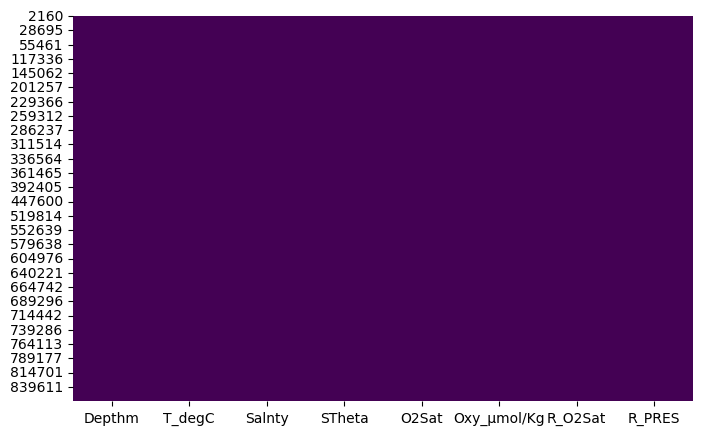

In [21]:
plt.rcParams["figure.figsize"] = (8,5)
sns.heatmap(data_bottle.isna(),cbar=False,cmap='viridis')

### CORRELATION MATRIX : 

<B>The correlation matrix </B> : is crucial for understanding the linear relationships between different variables in the dataset. It helps identify which variables are positively or negatively correlated with each other. This is particularly useful in data analysis and machine learning because:

- **Feature Selection:** Highly correlated variables might be redundant, and we can remove or combine them to avoid multicollinearity issues in regression models.
- **Predictive Power:** Variables that are highly correlated with the target variable (e.g., T_degC) might be strong predictors in regression or classification tasks.
- **Understanding Data:** It provides insights into how variables behave together, aiding in hypothesis generation or validation.

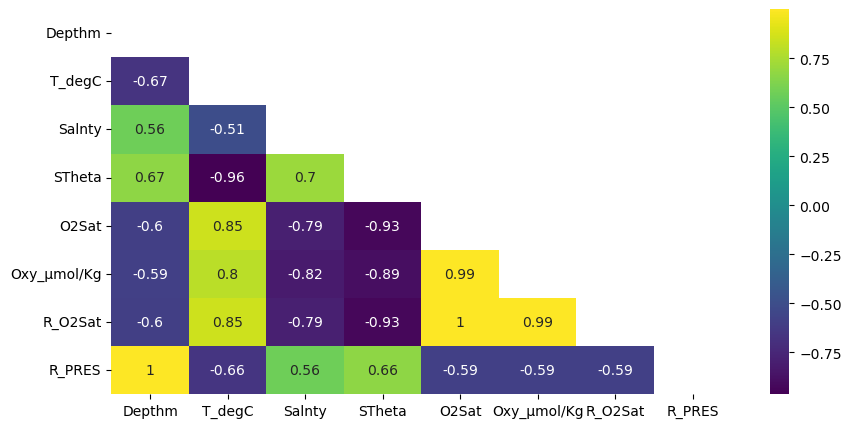

In [22]:
plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(data_bottle.corr(numeric_only = True), dtype=bool))
sns.heatmap(data_bottle.corr(numeric_only = True), cbar = True, annot = True, cmap="viridis", mask = mask);

### Interpretation of the Correlation Matrix Results
- **T_degC** is negatively correlated with Depthm (-0.67) and positively correlated with O2Sat (0.85), R_O2Sat (0.85), and Salnty (0.56). This suggests that as depth increases, the temperature decreases, while higher levels of dissolved oxygen are found at warmer temperatures.
- **Salnty** is strongly negatively correlated with STheta (-0.96), indicating a strong inverse relationship between these two variables.
- **O2Sat** and Oxy_µmol/Kg are almost perfectly correlated (0.99), which suggests these two measurements are capturing the same or very similar information.
- **R_PRES** is perfectly correlated with Depthm (1.0), which makes sense as pressure increases with depth in oceanographic contexts.
This matrix helps us decide which variables to include or exclude from the regression model to prevent multicollinearity and ensure the model performs well.

### Pairplots

C:\Users\hp\anaconda3\envs\mon_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


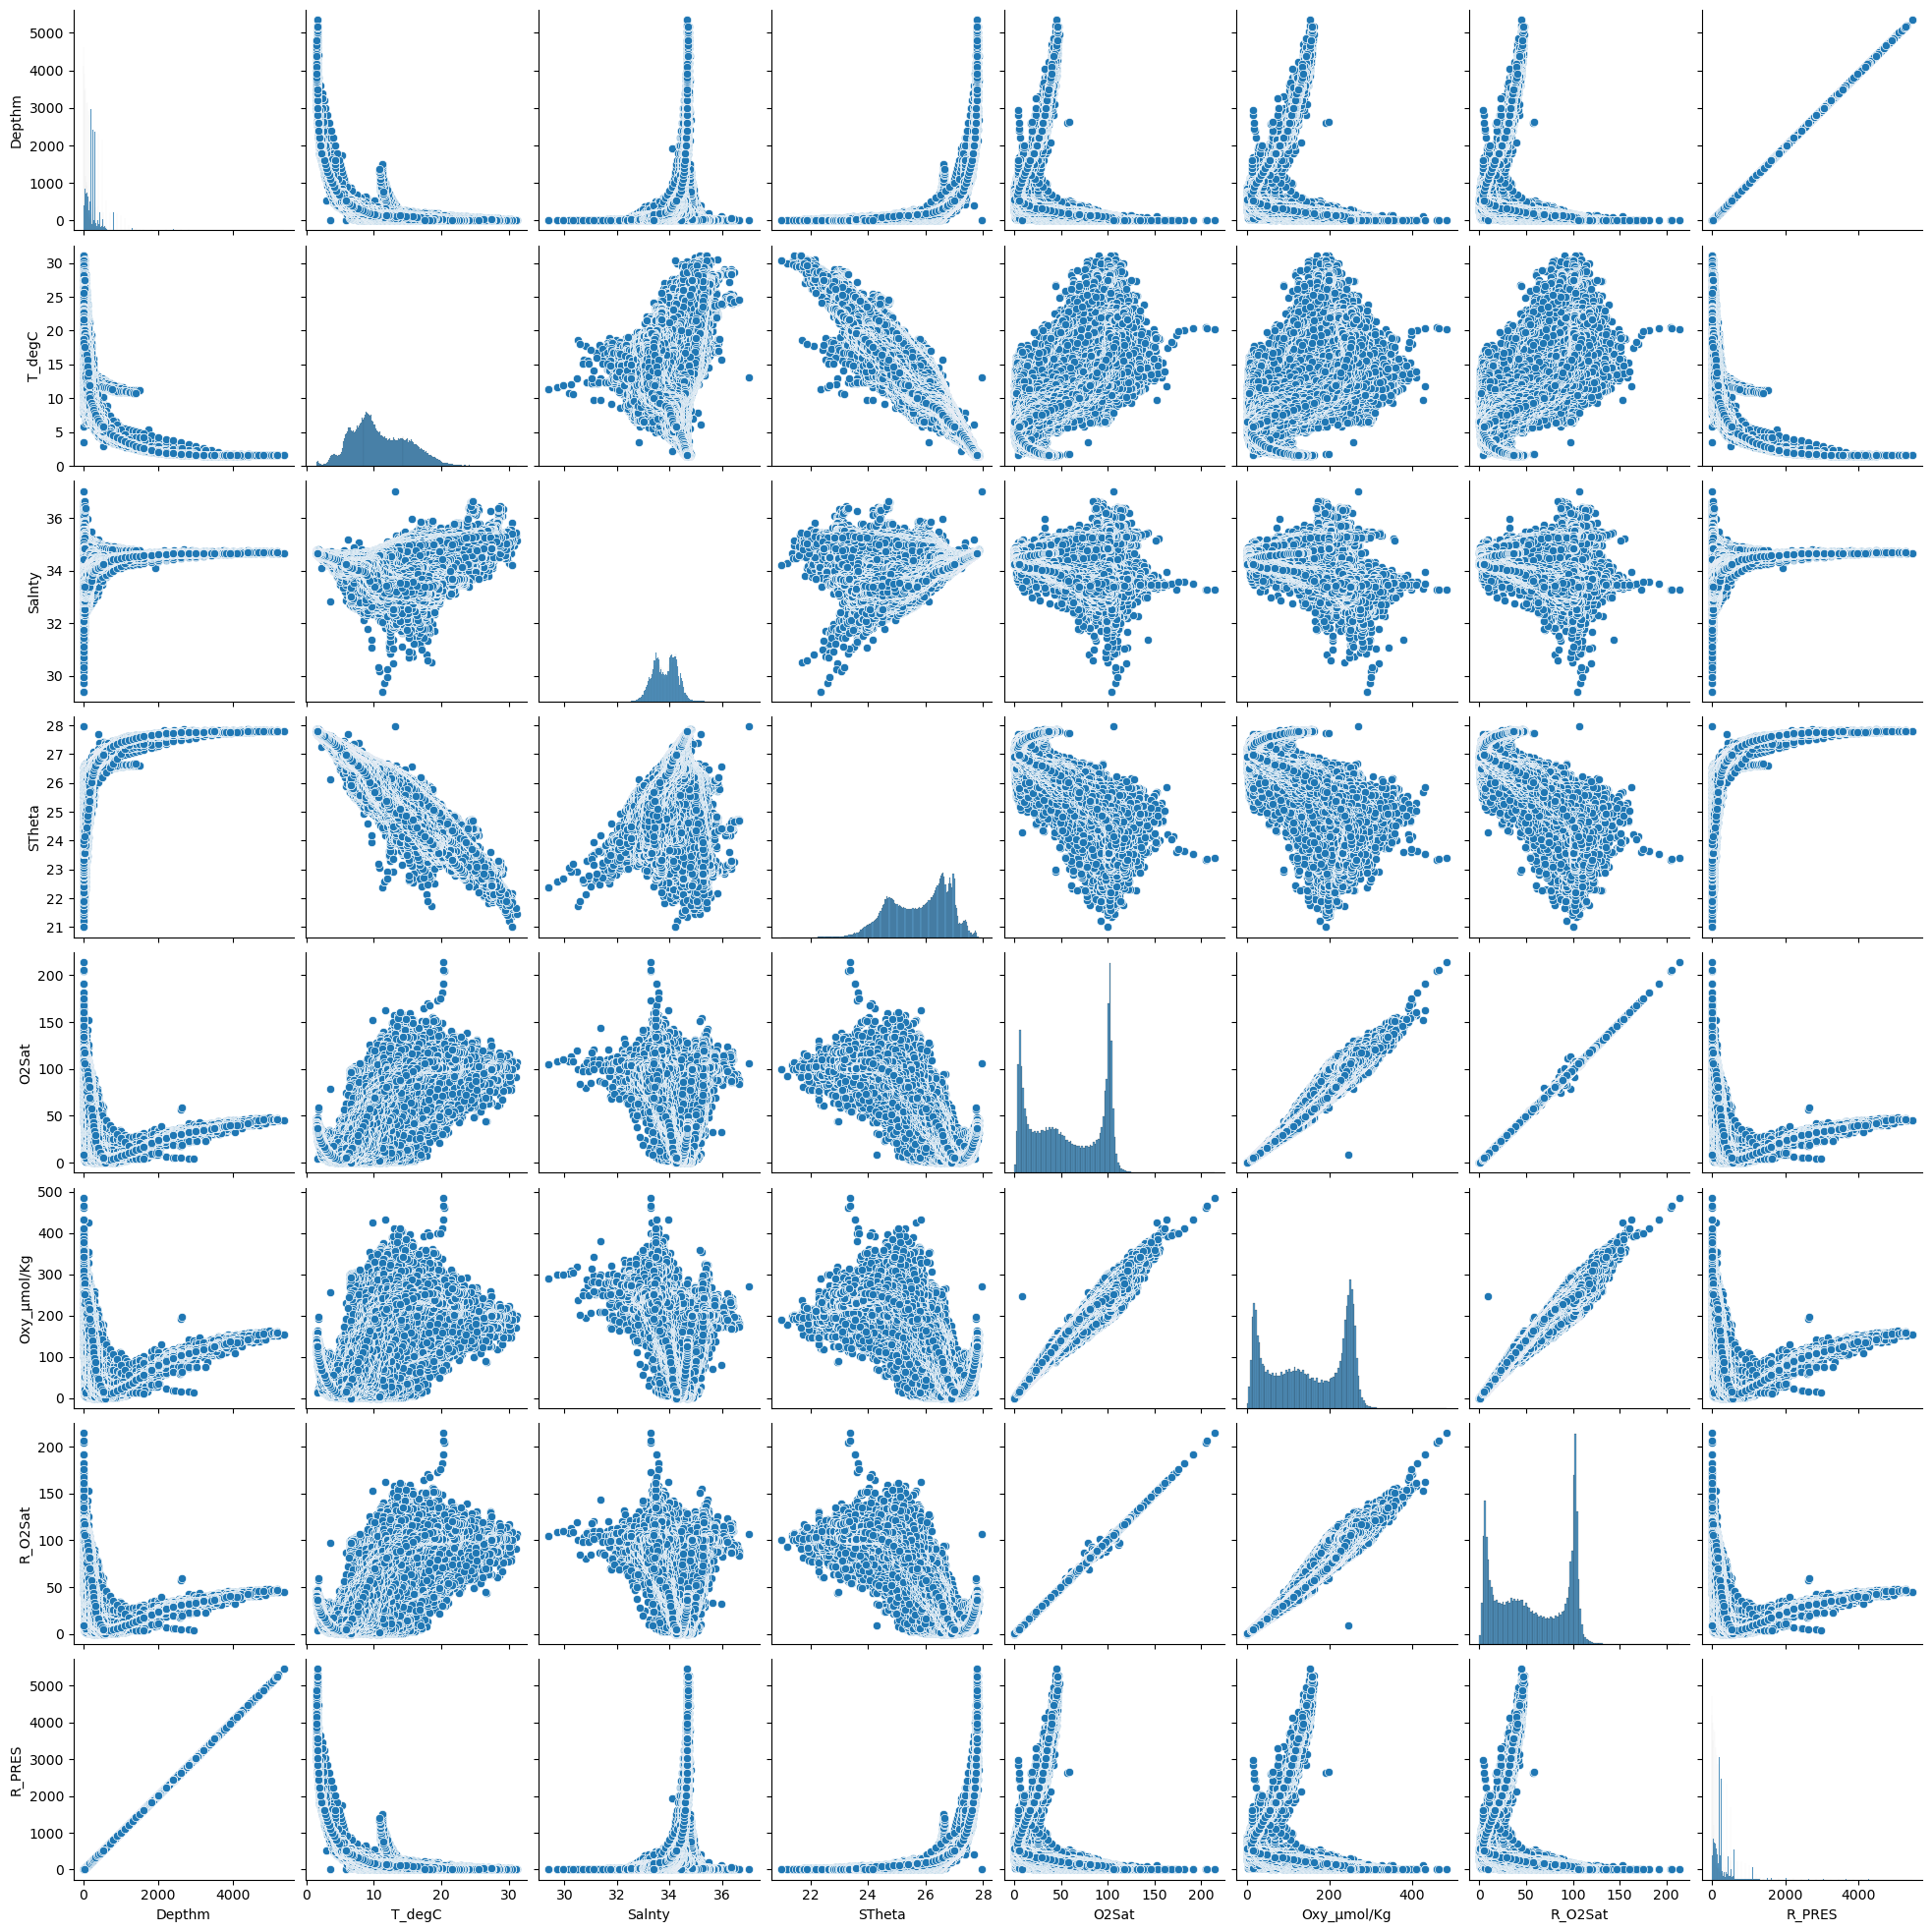

In [23]:
sns.pairplot(data_bottle)

##### Some scatterplots reveal strong linear relationships between certain variables. These are indicated by points closely following a straight-line pattern. A clear linear trend can suggest high positive or negative correlations.

For instance: - variables `Depthm` and `R_PRes` seem to have strong positive correlations 
              - variables `R_O2Sat` and  `O2Sat` seem to have strong positive correlations

##### In some scatterplots, the relationship between variables isn’t linear but curved, which could indicate a more complex interaction  

For instance: - variables `R_PRes` and `O2Sat`,   or `Oxy_µmol/Kg` and `Depthm` have scatter plot forms a “U” or “inverse U”, this indicates a quadratic or exponential relationship. 


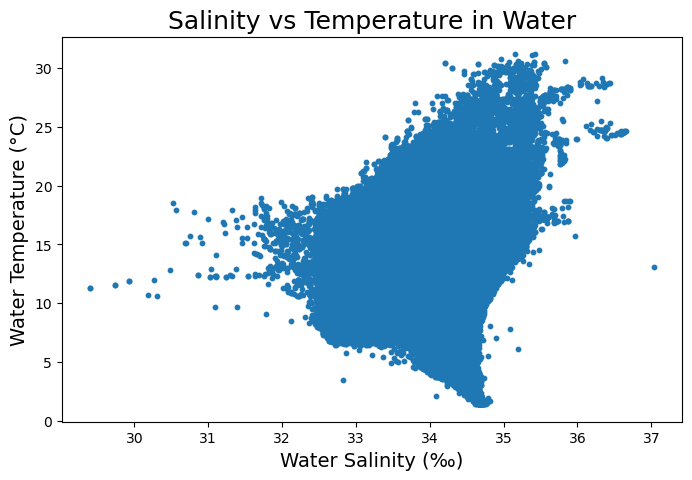

In [24]:
plt.scatter(data_bottle["Salnty"], data_bottle["T_degC"],s=10)
plt.xlabel('Water Salinity (‰)',fontsize=14)
plt.ylabel('Water Temperature (°C)',fontsize=14)
plt.title('Salinity vs Temperature in Water',fontsize=18)
plt.show()


**Interpretation:** 

- Pattern: There is a visible cluster or relationship between salinity and temperature. At lower salinities (between 30 and 34‰), we see a wider spread of temperatures (from 0°C to around 30°C), while at higher salinities (above 35‰), the temperature is more narrowly distributed (from around 10°C to 25°C).


- Tight Grouping: A large concentration of points exists in the range of salinities between 34 and 35‰, corresponding to temperatures between 10°C and 25°C.

- Non-Linear Relationship: The scatter of points shows that the relationship is not purely linear. However, we can infer that salinity and temperature are correlated, and as salinity increases, temperature tends to stabilize within a narrower range.


**Key Takeaways:**
- Salinity as a Feature: The wide range of temperatures at lower salinity values indicates that while salinity has some predictive power, other factors might also influence water temperature significantly.

- Narrow Range at High Salinity: High salinity environments tend to have more stable temperatures, which could provide valuable information when building your model.


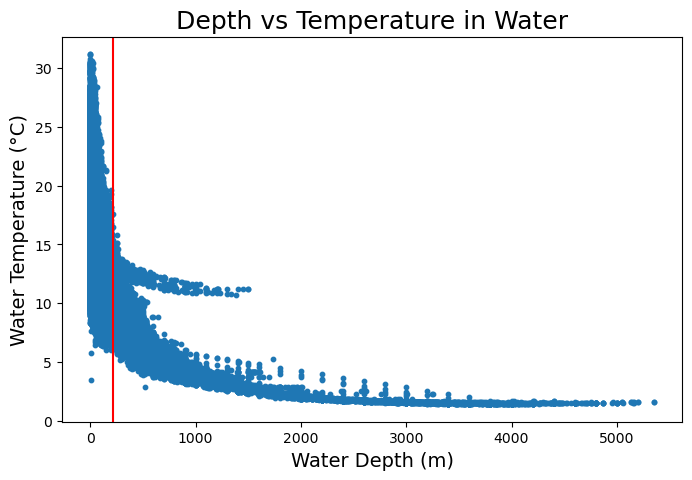

<bound method NDFrame._add_numeric_operations.<locals>.mean of 2160       0
2161       6
2162      10
2163      15
2164      20
          ..
864858     0
864859     2
864860     5
864861    10
864862    15
Name: Depthm, Length: 659654, dtype: int64>

In [25]:
plt.scatter(data_bottle["Depthm"], data_bottle["T_degC"],s=10)
plt.xlabel('Water Depth (m)',fontsize=14)
plt.ylabel('Water Temperature (°C)',fontsize=14)
plt.title('Depth vs Temperature in Water',fontsize=18)
plt.axvline(x = data_bottle["Depthm"].mean(), color = 'r')
plt.show()
data_bottle["Depthm"].mean

**Interpretation:**
- Trend: The scatter plot shows a strong negative correlation between depth and temperature. As depth increases, the temperature drops significantly.

- Shallow Waters (0-500 meters): The temperature is much more variable, ranging from 5°C to 30°C, indicating that in shallow waters, temperature can vary greatly.

- Deep Waters (>2000 meters): The temperature tends to stabilize below 5°C, and at extreme depths (around 5000 meters), it drops to near-freezing levels (~0°C).
- Mean Depth (~1800 meters): Most of the points lie to the left of the red line, meaning the majority of data points have depths less than the mean value. Temperature tends to drop rapidly within the first few thousand meters and becomes stable at deeper levels.


**Key Takeaways:**
- Depth as a Strong Predictor: Depth has a clear and strong inverse relationship with temperature. This makes it a crucial predictor for modeling water temperature. Deeper waters are colder, and the deeper the water, the less variability in temperature you will see.

- Shallow vs. Deep Water: Shallow water areas will need more nuanced modeling, as temperature is more variable and influenced by factors beyond depth alone, while deep water temperatures are almost consistently cold.

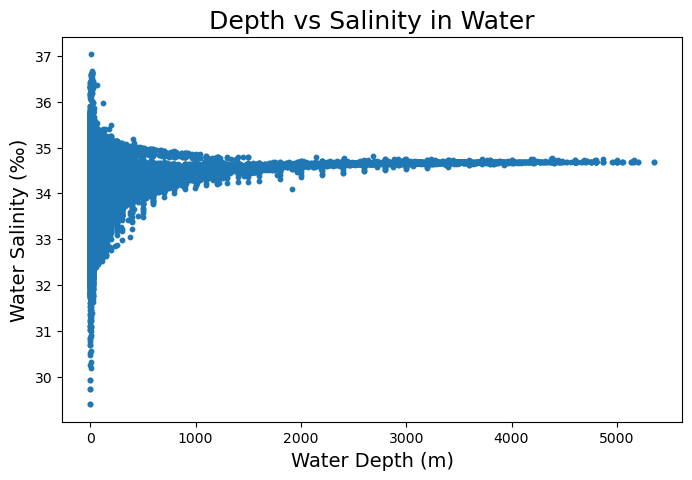

In [26]:
plt.scatter(data_bottle["Depthm"], data_bottle["Salnty"],s=10)
plt.xlabel('Water Depth (m)',fontsize=14)
plt.ylabel('Water Salinity (‰)',fontsize=14)
plt.title('Depth vs Salinity in Water',fontsize=18)
plt.show()

In [27]:
data_bottle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 659654 entries, 2160 to 864862
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Depthm       659654 non-null  int64  
 1   T_degC       659654 non-null  float64
 2   Salnty       659654 non-null  float64
 3   STheta       659654 non-null  float64
 4   O2Sat        659654 non-null  float64
 5   Oxy_µmol/Kg  659654 non-null  float64
 6   R_O2Sat      659654 non-null  float64
 7   R_PRES       659654 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 45.3 MB


In [28]:
# data_bottle['Depthm'] 
# target_variable

After examining the data and eliminating irrelevant or redundant variables, the next step is to build a regression model. We'll start by splitting the data into training and testing sets to evaluate the model's performance and prevent overfitting. This process involves separating the target variable (T_degC) from the rest of the dataset, then splitting the data into training (80%) and testing (20%) subsets.

# Building the regression model : 

In [29]:
from sklearn.model_selection import train_test_split

target_variable = data_bottle.pop('T_degC')
data_train, data_test, target_train, target_test = train_test_split(data_bottle, target_variable, test_size=0.2, random_state=12)

- **target_variable is T_degC** , the variable we want to predict, and the rest of the variables form the features that will be used for this prediction.
- **random_state=12**  ensures that the split is reproducible if the same code is run again.

### Scaling the Data
Before fitting the regression model, it's important to scale the data. Scaling ensures that all features are on the same scale, which is especially important for algorithms that rely on distance-based metrics, such as linear regression.

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.transform(data_test)

### Multiple lineare regression :

Multiple linear regression is a statistical technique used to model the relationship between one dependent variable and two or more independent variables. In this case, we aim to predict T_degC (temperature in degrees Celsius) based on the other features in the dataset, which have been scaled to ensure consistent units and variance.

The goal of multiple linear regression is to find the best-fitting linear equation that minimizes the error between the predicted and actual values of the target variable.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# creazione modello regressione lineare
model = LinearRegression()
model.fit(data_train_scaled, target_train)
y_predict1 = model.predict(data_test_scaled)

In the code above, a linear regression model is created using LinearRegression() from sklearn. The model is then trained (or "fitted") on the scaled training data (data_train_scaled) and the target variable (target_train), which is T_degC. After training, we use the model to make predictions (y_predict1) on the scaled test data (data_test_scaled).

In [32]:
# mse_lin
# data_train_scaled[0]

#### calculating the errore of the regressione model

After building the regression model, it’s important to evaluate its performance. One way to do this is by calculating the error between the predicted and actual values using metrics like Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

In [33]:
print(model)
mse_lin=mean_squared_error(y_predict1, target_test)
RMSE_lin=mse_lin**(1/2.0)

print('RMSE_lin:',RMSE_lin)

LinearRegression()
RMSE_lin: 0.30647235329893946


- Mean Squared Error (MSE) measures the average of the squared differences between predicted and actual values. A lower MSE indicates better model performance.
- Root Mean Squared Error (RMSE) is simply the square root of MSE, giving us an error metric in the same unit as the target variable (T_degC). RMSE is more interpretable since it represents the average magnitude of error in the predictions.

**In this case, the RMSE is 0.306, which suggests that the model's predictions deviate from the actual temperatures by approximately 0.306 degrees Celsius on average.** 

In [34]:
 """ An evaluation here is needeed + a graph !!!!
 """ 

' An evaluation here is needeed + a graph !!!!\n'

### Evaluation  : 

#### R² Score

 Coefficient of Determination: This measures the proportion of variance in the dependent variable that is predictable from the independent variables. A high \( R^2 \) (close to 1) indicates a good fit.


In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(target_test, y_predict1)
print('R²:', r2)


R²: 0.9946980757605939


In [36]:
''' interpretation !! '''

' interpretation !! '


#### Residual Analysis using a Residual Plot

A residual plot shows the residuals on the y-axis and the predicted values (or the independent variable) on the x-axis. This helps in assessing the homoscedasticity (constant variance) of the residuals.

In [37]:
residuals = target_test - y_predict1

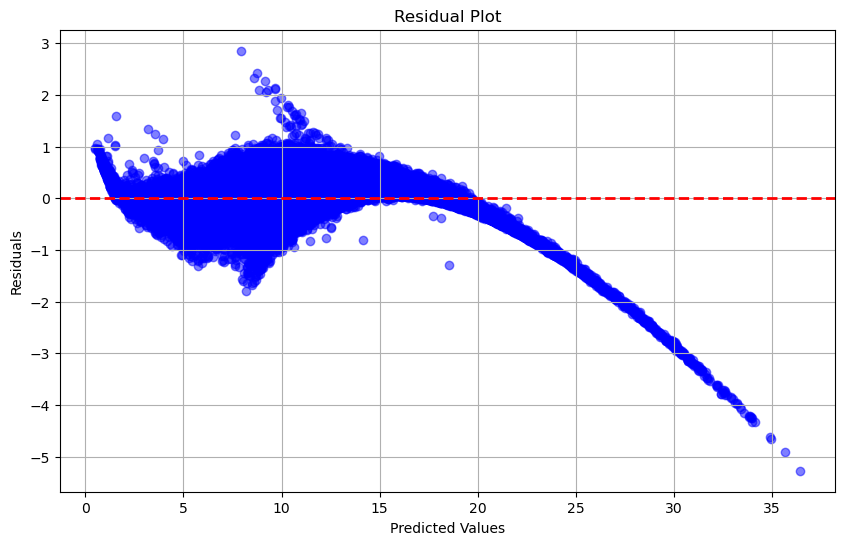

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_predict1, residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [39]:
''' An interpretation in needeh heere '''

' An interpretation in needeh heere '

#### Scatter Plot of Predicted vs. Actual Values

A scatter plot showing predicted values against actual target values helps visualize how well the model predictions align with the true values.

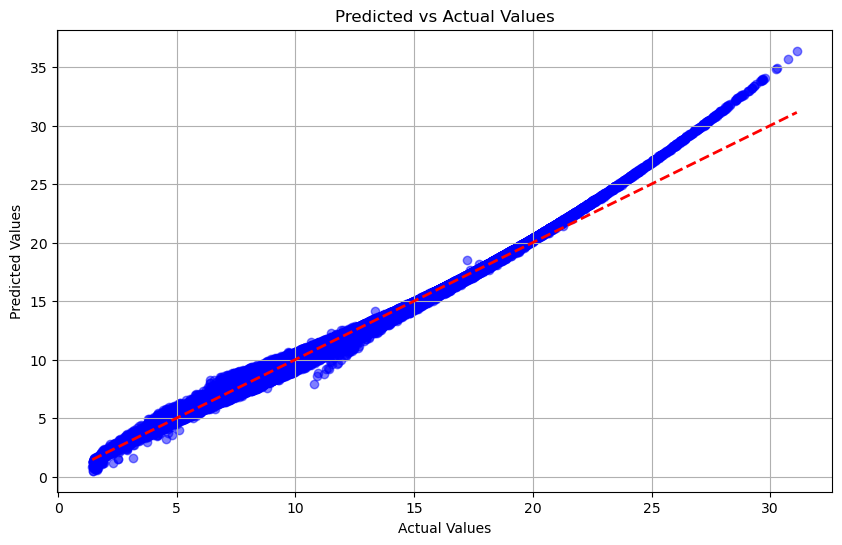

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(target_test, y_predict1, color='blue', alpha=0.5)
plt.plot([min(target_test), max(target_test)], [min(target_test), max(target_test)], color='red', linewidth=2, linestyle='--')  # Ideal line
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [41]:
''' Interpretation is highlly Needded '''

' Interpretation is highlly Needded '

### Polynomial Regression 

By using polynomial features, we can fit a non-linear relationship between the independent variables and the target variable. This is particularly useful when our data exhibits curvature or complex patterns that cannot be represented by a straight line.

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

**Grid Search :**

In [43]:
# define pipeline
pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())
])

# define parameter grid
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5],
    'ridge__alpha': np.logspace(-3, 3, 7, 5)
}

grid_search = GridSearchCV(pipe, param_grid, cv=5)

# run grid search
grid_search.fit(data_train_scaled, target_train)

# print results
print("Best hyperparameters:", grid_search.best_params_)
print("Training score:", grid_search.best_score_)
warnings.filterwarnings('default') 

C:\Users\hp\anaconda3\envs\mon_env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
70 fits failed out of a total of 175.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\envs\mon_env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\envs\mon_env\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\hp\anaconda3\envs\mon_env\lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, *

Best hyperparameters: {'poly__degree': 3, 'ridge__alpha': 1.0}
Training score: 0.9999862596649753


####  The `Pipeline` allows us to streamline our workflow by chaining multiple processing steps together. Here, we are first generating polynomial features using PolynomialFeatures() and then applying Ridge regression through Ridge()

#### The `param_grid` defines the hyperparameters we want to optimize. For polynomial features, we are testing degrees from 1 to 5, and for Ridge regression, we are testing a range of alpha values, which control the regularization strength.

#### `GridSearchCV` is used to perform an exhaustive search over the specified hyperparameter grid. Here, we are using 5-fold cross-validation `(cv=5)` to ensure that our model is evaluated on different subsets of the training data, helping to avoid overfitting.

In [44]:
print(grid_search.cv_results_['mean_test_score'])
print("Best hyperparameters:", grid_search.best_params_)
# print(f' mean_test_score { grid_search.cv_results_['mean_test_score'] }')

[0.99463831 0.9946383  0.99463636 0.99456748 0.994365   0.99428044
 0.99381954 0.99879257 0.99877624 0.99890986 0.99952095 0.99977656
 0.99976682 0.99935158 0.99615279 0.99937078 0.99993598 0.99998626
 0.99997933 0.99995638 0.99939406        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan]
Best hyperparameters: {'poly__degree': 3, 'ridge__alpha': 1.0}


**The best `polynomial degree` is 3, indicating that a fifth-degree polynomial best fits the training data. This suggests that the relationship between the independent and dependent variables is quite complex.**


**`The Ridge regularization` strength (alpha) of 0.1 indicates a moderate level of regularization, which helps prevent overfitting while still allowing the model to learn the underlying patterns in the data.**


**The training score of approximately 1.0 indicates that the model fits the training data extremely well. However, such a high score should be approached with caution, as it could indicate overfitting, especially if the model performs poorly on unseen test data.**

In [47]:
# Get the best estimator (pipeline) from the grid search
best_model = grid_search.best_estimator_

# Access the Ridge model inside the pipeline
ridge_model = best_model.named_steps['ridge']

# Now you can access the coefficients and intercept from the Ridge model
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_
features = data_train.columns

# Print the intercept and coefficients
print("Intercept:", intercept)
for i, feature in enumerate(features):
    print(f"{feature}: {coefficients[i]}")

Intercept: 11.548807711117869
Depthm: 0.0
Salnty: -0.014563061536432017
STheta: 1.7526832433996318
O2Sat: -5.199799921040674
Oxy_µmol/Kg: 1.1056206448153596
R_O2Sat: -1.8657077868753558
R_PRES: 0.878725746888088


**Key influences:** 

     Variables like STheta (temperature) and Oxy_µmol/Kg (oxygen concentration) have strong positive impacts on the target variable, while O2Sat (oxygen saturation) has a significant negative effect. 
     
**Less impact:** 
          
          Variables like Salnty (salinity) and R_PRES (pressure) have smaller but noticeable impacts, and Depthm appears to have no impact in this model.

### Evaluation : 

In [48]:
from sklearn.metrics import mean_squared_error

best_model = grid_search.best_estimator_
predictions = best_model.predict(data_test_scaled)
mse = mean_squared_error(target_test, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", best_model.score(data_test_scaled, target_test))

Mean Squared Error: 0.00020368646456277037
R^2 Score: 0.9999885022441733


#### Residual Plot

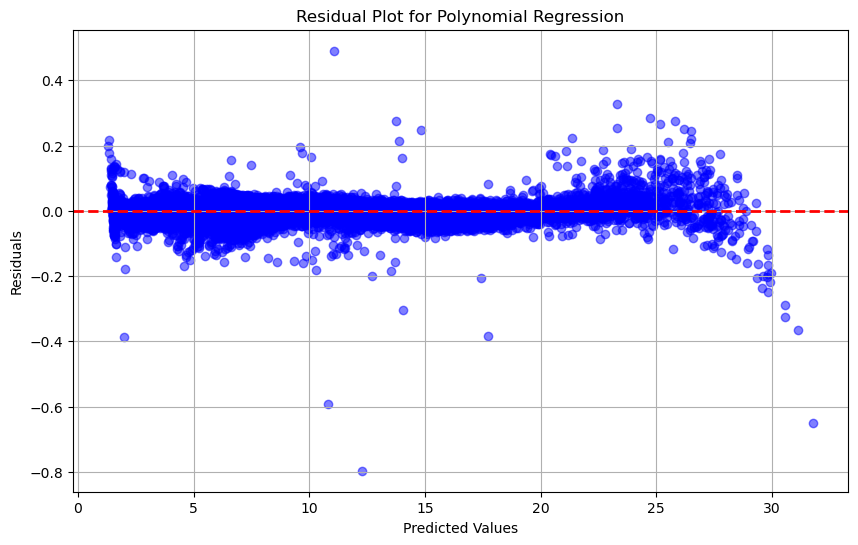

In [51]:
residuals_poly = target_test - predictions

# Create the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals_poly, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot for Polynomial Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

''' Interpretation : '''
 
      The residual plot suggests that the polynomial regression model is performing reasonably well but shows signs of heteroscedasticity and potential outliers. It may also indicate that the model struggles to predict accurately for very low and very high values, which could suggest the need for further model refinement or data preprocessing (e.g., transforming variables or removing outliers).

#### Scatter Plot of Predicted vs. Actual Values

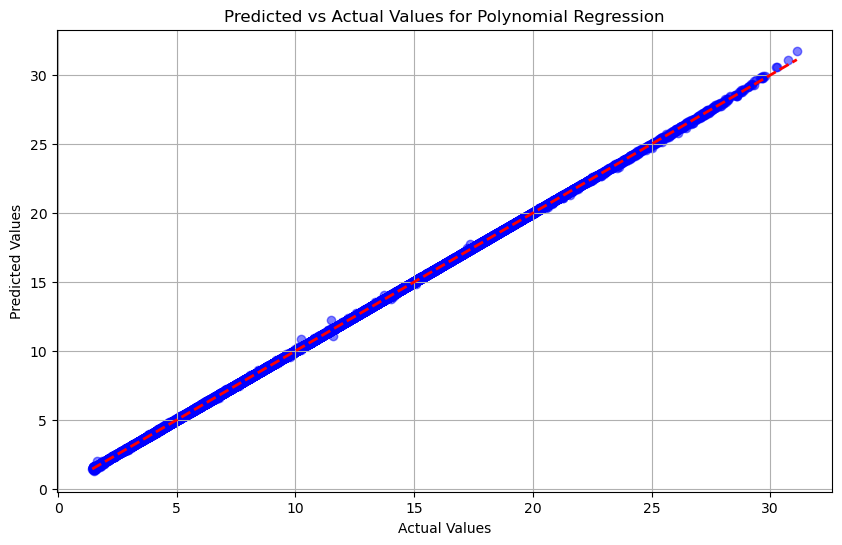

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(target_test, predictions, color='blue', alpha=0.5)
plt.plot([min(target_test), max(target_test)], [min(target_test), max(target_test)], color='red', linewidth=2, linestyle='--')  # Ideal line
plt.title('Predicted vs Actual Values for Polynomial Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()